# Penguins Machine Learning Project

Katty Geng 

Varshitha Kedila 

Mitchell Tam Fong

# Group Contribution Statement

All three of us wrote and discussed the data acquisition and preparation during discussion. Mitchell wrote the project overview. Varshitha led Figure 1 and wrote explanation for the KNN model. Mitchell led Figure 2 and wrote explanation for the RF model. Katty led Figure 3, Table 1, and wrote explanation for the SVM model. Mitchell wrote the explanation for the first two figures, and Katty wrote the explanation for the third figure and both Katty and Varshitha wrote explanations for the table. Varshitha led the confusion matrix code. Katty led the decision region and feature selection code. Katty wrote the conclusion. We all checked each other’s work and made revisions to code and writing.

# Project Overview

In general, a machines is able to learn from the data and make predictions based off the data, ans it then build analytical models and identify patterns with little to no human intervention. Thus, machine learning is a powerful tool when it comes to data analysis. 

Our project will display several different machine learning models used on a data set about penguins. The data set classifies three species of penguins from three different islands by features such as culmen length, culmen depth, flipper length, body mass, and sex, but we will focus on three variables (2 quantitative and 1 qualitative) for each species to predict the species of each penguin. To achieve this goal, we will be performing the following steps: data import and cleaning, exploratory analysis, feature selection and cross-validation. Then, we will build different machine learning models to evaluate the unseen test data and analyze the performance of each model.

In [1]:
#standard import 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# I. Data Import and Cleaning 

After importing the standard python dependencies and importing the penguins data set, we can start looking at the data. With the spreadsheet (.csv) file in the pandas data frame, we can use .head() to inspect the first 5 rows of the data.

In [2]:
penguins = pd.read_csv("palmer_penguins.csv")
penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


We then split the data into train and test sets. Making the test_size=0.2 allows us to make a mini test set with 20% of the data and train the model on the other 80% (80% training, 20% testing), then evaluate 20% and take a different 20% and train on it many times. 

In [3]:
from sklearn.model_selection import train_test_split
np.random.seed(1111)
train, test = train_test_split(penguins, test_size = 0.2)

In [4]:
from sklearn import preprocessing

def prep_penguins_data(data_df):
    """
    helps preprocessing the data, incluidng encodes nonnumerical columns, drop unuseful columns,
    drop nan values, and separate predict and target variables 
    """
    le = preprocessing.LabelEncoder()
    df = data_df.copy()
    
    #drop irrelevant columns for our purposes 
    drop_cols = ['studyName', 'Individual ID', 'Region', 'Sample Number', 
              'Stage', 'Clutch Completion', 'Date Egg', 'Comments']
    df = df.drop(drop_cols, axis = 1)
    
    #drop nan values 
    df = df.dropna()
    
    #encodes qualitative data
    df['Species'] = le.fit_transform(df['Species'])
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Island'] = le.fit_transform(df['Island'])
    
    #separate species column from the rest 
    X = df.drop(['Species'], axis = 1)
    y = df['Species']   
    return X, y

X_train, y_train = prep_penguins_data(train)
X_test, y_test = prep_penguins_data(test)

In [5]:
#prep a separate set of data only for visualization
vis_cols = ["Species", "Island", "Culmen Length (mm)", "Culmen Depth (mm)"] #these are the variables we wants to explore
penguins_vis = penguins[vis_cols] #penguins_vis is a subset of the original penguins used only for visualization
penguins_vis.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3


# II. Exploratory Analysis

## First graph: Culmen Length vs. Culmen Depth 

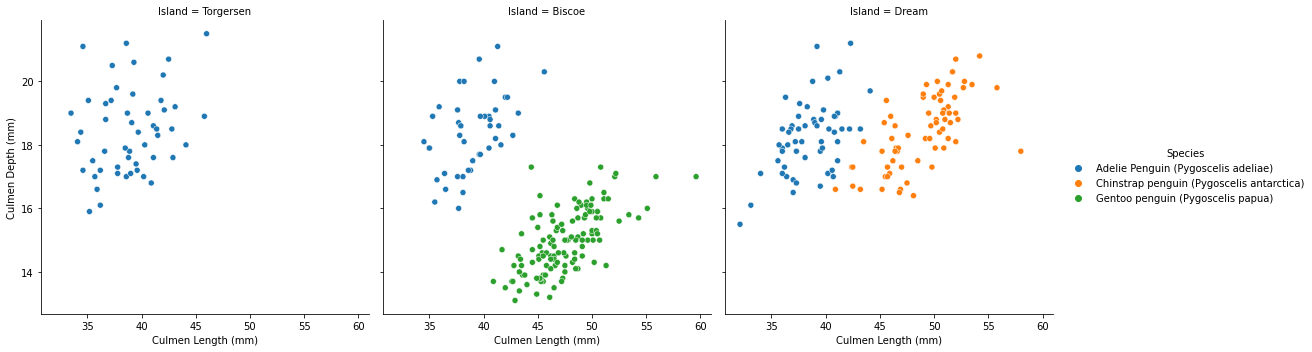

In [6]:
import seaborn as sns
sns.relplot(x='Culmen Length (mm)', y='Culmen Depth (mm)', hue='Species', col = "Island", data=penguins_vis)

By plotting each species of penguin by their culmen length and depth for each island, the scatter plot shows that Adelie penguins typically have the lowest culmen length and a higher culmen depth (about same as Chinstrap), no matter what island. And Adelie penguins seem to have the about the same culmen length and depth for each island. Meanwhile,
Gentoo penguins only exist on the island of Biscoe for this data set and they typically have the lowest culmen depth
and higher culmen length (about same as chinstrap, but a few mm less on average). And the Chinstrap penguins seem to have both the highest culmen length and culmen depth on average. Also, there is positive relationship between the two variables for each species: as culmen length becomes larger, culment depth is also larger. 

## Second graph: Culmen Depth Separated by Islands and Species

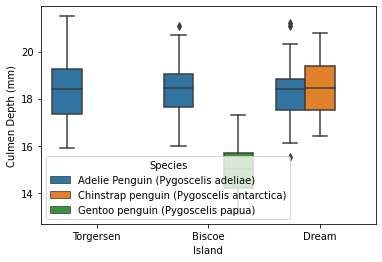

In [7]:
ax = sns.boxplot(x="Island", y="Culmen Depth (mm)", hue="Species", data=penguins_vis)

The boxplot shows that the mean culmen depth for Adelie penguins is consistently around 18.3mm for any of the islands,
with Chinstrap penguins having about the same mean culmen depth at about 18.4mm, but Gentoo penguins having a much lower mean culmen depth at about 15mm. The range in culmen depth for Adelie penguins is consistently between about 16mm and just over 21mm, with a few outliers. The Gentoo penguins have a culmen depth range from about 13 to 17.3mm and Chinstrap penguins have a culmen depth rang from about 16.4mm to almost 21mm.

## Third graph: Culmen Length Separated by Islands and Species

<AxesSubplot:xlabel='Island', ylabel='Culmen Length (mm)'>

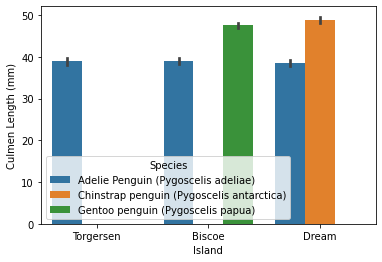

In [8]:
sns.barplot(data=penguins_vis, x="Island", y ="Culmen Length (mm)", hue="Species")

The barplot shows the mean culmen length for each penguin species on each island: the culmen length of Adelie penguins is consistently much lower than other two species at around 38.5 - 38.9 mm for any of the islands, with Chinstrap penguins having about a mean culmen length of 48.8 mm, and Gentoo penguins having a similar mean culmen length with Chinstrap at about 47.5 mm. In addition, by grouping them by islands, we know that Adelie penguins exist on all three islands, but Chinstrap only exists on Dream island and Gentoo only exists on Biscoe island. It means that all penguins on Torgersen must be the Adelie penguins which is a great implications for further inference. 

## Summary Table Grouped by Species and Islands

In [9]:
summary = penguins_vis.groupby(["Species", "Island"]).aggregate([np.mean, np.std, np.max])
summary

Culmen Length (mm)  \
                                                                  mean   
Species                                   Island                         
Adelie Penguin (Pygoscelis adeliae)       Biscoe             38.975000   
                                          Dream              38.501786   
                                          Torgersen          38.950980   
Chinstrap penguin (Pygoscelis antarctica) Dream              48.833824   
Gentoo penguin (Pygoscelis papua)         Biscoe             47.504878   

                                                                     \
                                                          std  amax   
Species                                   Island                      
Adelie Penguin (Pygoscelis adeliae)       Biscoe     2.480916  45.6   
                                          Dream      2.465359  44.1   
                                          Torgersen  3.025318  46.0   
Chinstrap penguin (Pygoscelis antarctica) Dream      3.339256  58.0   
Gentoo penguin (Pygoscelis papua)         Biscoe     3.081857  59.6   

                                                    Culmen Depth (mm)  \
                                                                 mean   
Species                                   Island                        
Adelie Penguin (Pygoscelis adeliae)       Biscoe            18.370455   
                                          Dream             18.251786   
                                          Torgersen         18.429412   
Chinstrap penguin (Pygoscelis antarctica) Dream             18.420588   
Gentoo penguin (Pygoscelis papua)         Biscoe            14.982114   

                                                                     
                                                          std  amax  
Species                                   Island                     
Adelie Penguin (Pygoscelis adeliae)       Biscoe     1.188820  21.1  
                                          Dream      1.133617  21.2  
                                          Torgersen  1.339447  21.5  
Chinstrap penguin (Pygoscelis antarctica) Dream      1.135395  20.8  
Gentoo penguin (Pygoscelis papua)         Biscoe     0.981220  17.3

The summary table clearly presents the same patterns we observed in previous graphs by using numerical datas. Thus, we can consolidate and conclude important information as follows that will help us to predict species of penguins: 
1) All penguins on Torgersen are Adelie Penguin.

2) Gentoo penguin has the lowest culmen depth. 

3) Adelie penguin has the lowest culmen length. 

4) Chinstrap and Gentoo have similar culmen length. 

5) Chinstrap and Adelie have similar culment depth.

6) Standard deviations for all three species for the culmen length are greater than the that of the culmen depth for the species, meaning that there is a larger range of lengths that deviate from the mean for the length verses the depth

# III. Feature Selection

In [10]:
from sklearn.model_selection import cross_val_score

def check_column_score(cols, c):
    """
    Trains and evaluates the model via cross validation on the columns 
    of the dataset with select items  
    -----------
    parameters: 
    cols: selected columns 
    c: machine learning models 
    -----------
    return: 
    the mean of cross validation scores 
    """
    return cross_val_score(c, X_train[cols], y_train, cv=5).mean()
    
def select_columns(cols, c):
    """
    Select the best combos of variables that gives out the highest cross
    validation score 
    """
    best_score = 0
    best_cols = []
    
    for i in cols:
        for j in cols:
            check_cols = [i, j, "Island"] #generate combos of two quantitative variables + island
            score = check_column_score(check_cols, c)
            if score >= best_score:
                best_score = score
                best_cols = check_cols
    return best_cols, best_score

#here are the columns we are interested in testing 
cols = ["Culmen Depth (mm)", "Culmen Length (mm)", "Flipper Length (mm)", 
        "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

Now we apply the function to our three machine learning models to check the combos of features that give the highest cross validation score.

In [11]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
select_columns(cols, RF)

(['Culmen Depth (mm)', 'Culmen Length (mm)', 'Island'], 0.9884615384615385)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
select_columns(cols, KNN)

(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island'], 0.9653092006033182)

In [13]:
from sklearn import svm
SVM = svm.SVC()
select_columns(cols, SVM)

(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island'], 0.8724736048265459)

It turns out that the combo of Culmen Length (mm), Culmen Depth (mm), Island always gives out the best score. Thus, these three will be our selected features. 

In [14]:
selected_features =["Culmen Length (mm)","Culmen Depth (mm)","Island"]
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# IV. Modeling 

### First Model: Random Forest

### i) Complexity Parameter

We first try to find the best depth of the model.

[Text(0.5, 1.0, 'Best Depth: 6')]

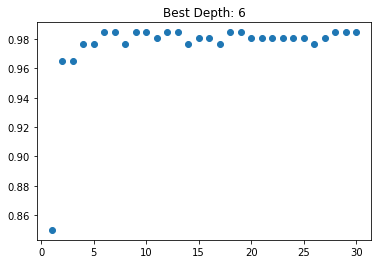

In [15]:
N = 30
scores = np.zeros(N)
best_score = -np.inf
for d in range(1,N+1):
    RF = RandomForestClassifier(max_depth=d)
    scores[d-1]=cross_val_score(RF, X_train, y_train, cv=5).mean()
    if scores[d-1]>best_score: 
        best_score = scores[d-1]
        best_depth = d
        
fig, ax = plt.subplots(1)
ax.scatter(np.arange(1,N+1), scores)
ax.set(title="Best Depth: " + str(best_depth))

Now that we have a reasonable estimate of the optimal depth, we can try evaluating against the unseen testing data. 

In [16]:
RF = RandomForestClassifier(max_depth = best_depth)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.9848484848484849

The score indicates that the accuracy of this model predicting the species of penguins is around 98.5%. 

### ii) Confusion Matrix

In [17]:
y_pred = RF.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[31,  0,  1],
       [ 0, 10,  0],
       [ 0,  0, 24]])

We have one error in this confusion matrix shown by the one in the top right corner of the matrix, where an Adelie was incorrectly predicted to be a Gentoo penguin.

### iii) Decision Region

In [18]:
import matplotlib.patches as mpatches

#create a dictionary for colors 
color_mapping = {
    0: "skyblue" ,
    1: "salmon", 
    2: "gold"
}

#create a dictionary for island names 
island_names = {
        0 : "Biscoe", 
        1 : "Dream", 
        2 : "Torgersen" 
}

def plot_regions(X, c, y) :
    """
    Visualizes the decision regions for classifiers against data
    """
    X = X_train[["Culmen Length (mm)","Culmen Depth (mm)", "Island"]]
    y = y_train
    c.fit(X,y)
    
    for island in range(3): #three islands encoded as 0,1,2
        mask = X["Island"] == island #create a mask that matches island column in X with 0,1,2
    
        x0=X["Culmen Length (mm)"][mask] 
        x1=X["Culmen Depth (mm)"][mask]

        grid_x=np.linspace(x0.min(),x0.max(),501) 
        grid_y=np.linspace(x1.min(),x1.max(),501) 

        xx,yy=np.meshgrid(grid_x,grid_y)
        np.shape(xx),np.shape(yy)

        XX=xx.ravel()
        YY=yy.ravel()
        ZZ=island * np.ones(XX.shape)

        p=c.predict(np.c_[XX,YY,ZZ])

        p=p.reshape(xx.shape)

        #plot the decision regions
        ax[island].contourf(xx,yy,p,alpha=.2, colors = ("skyblue", "salmon", "gold"), levels = [-1, 0, 1, 2])
        ax[island].scatter(x0,x1,c = [color_mapping[v] for v in y[mask]])
        ax[island].set(xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)")
        ax[island].set(title = island_names[island])
        
        #add legend to the graph
        Adelie = mpatches.Patch(color='skyblue', label='Adelie')
        Chinstrap = mpatches.Patch(color='salmon', label='Chinstrap')
        Gentoo = mpatches.Patch(color='gold', label='Gentoo')
        plt.legend(handles=[Adelie, Chinstrap, Gentoo])

""


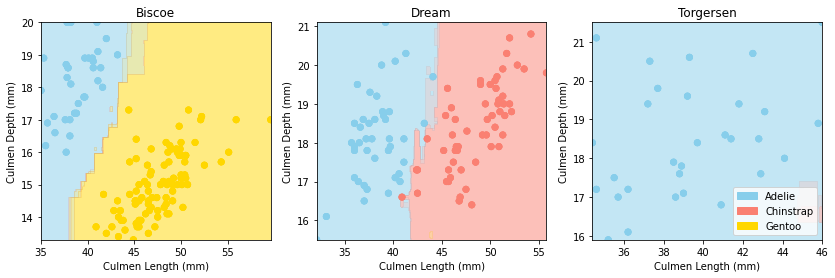

In [19]:
fig,ax=plt.subplots(1, 3, figsize = (14,4))
X_train.groupby(["Island"]).apply(plot_regions, RF, y_train)

For the Random Forest model, there is only one error in the graph in the middle decision region graph where a Chinstrap penguin (red dot) appears in the blue shaded area where it is supposed to be the region for an Adelie penguin. And we can see in the middle decision region graph, the model overfits where the red region creates a small red rectangle as it tries to extend to keep that red dot in the region. But this red dot appears in the wrong region for all three models, so this Chinstrap penguin likely just has a lower culmen depth and length that makes it seem like an Adelie penguin, and the model would have to overfit to properly classify this Chinstrap penguin. But overall the Random Forest model classified the most penguins correctly in the right decision regions out of the three models, so it did a pretty good job.

### Second Model: K-Nearest Neighbors 

### i) Complexity Parameter 

[Text(0.5, 1.0, 'Best Number: 3')]

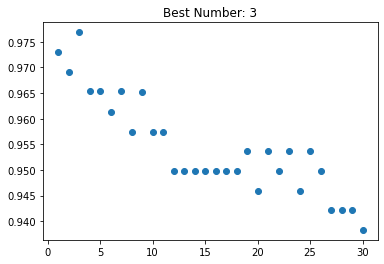

In [20]:
N=30
scores=np.zeros(N)
best_score=-np.inf

for d in range(1,N+1):
    KNN = KNeighborsClassifier(n_neighbors = d)
    scores[d-1] = cross_val_score(KNN, X_train, y_train, cv=5).mean()
    if scores[d-1]>best_score:
        best_score=scores[d-1]
        best_number=d

fig, ax = plt.subplots(1)
ax.scatter(np.arange(1,N+1), scores)
ax.set(title="Best Number: " + str(best_number))

Our KNN model returns a best number of 3 that we fit into the model to evaluate its performance.

In [21]:
KNN = KNeighborsClassifier(n_neighbors = best_number)
KNN.fit(X_train, y_train)
KNN.score(X_test, y_test)

0.9696969696969697

Our model's mean accuracy in predicting the penguin's species was 96%.

### ii) Confusion Matrix

In [22]:
y_pred = KNN.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[31,  1,  0],
       [ 0,  9,  1],
       [ 0,  0, 24]])

Our confusion matrix shows that in two instances our predicted values for penguin species do not match our actual values where we predicted the Adelie to be a Chinstrap and a Chinstrap to be a Gentoo. However, majority of our predicted values matched the actual values as decpited through our non-zero diagonal matrix.

### iii) Decision Region

""


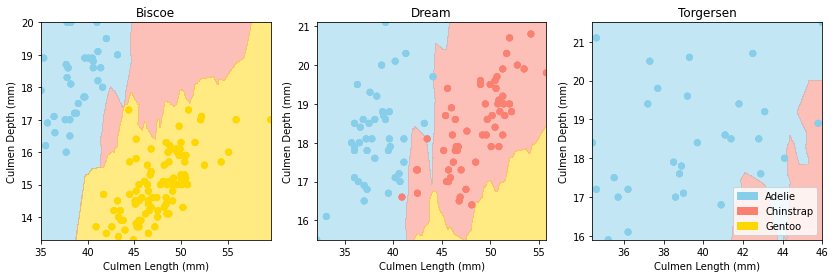

In [23]:
fig,ax=plt.subplots(1, 3, figsize = (14,4))
X_train.groupby(["Island"]).apply(plot_regions, KNN, y_train)

In our decision region for KNN, we can see mistakes in both the Dream and Torgensen islands. In the second graph, two red dots associated with Chinstrap penguins are found a little past the red/blue boundary in the Adelie region. As shown in the boxplot and scatter plot figures earlier, the culmen depth for the Chinstrap and Adelie are relatively similar which may translate to such a mistake in the decision region. Similarly, the model finds it hard to differentiate the two species on the Torgesen Island decision region where a Adelie blue dot is found within the Chinstrap decision boundary. However, our model still does a good job at differentiating majority of the time as the Gentoo dots are all found within the Gentoo region as depicted in the Biscoe Island graph. This can be attributed to the fact that the Gentoo's culmen length and depth are not close to that of the other two species, making it easier for the model to categorize them. The KNN algorithm may be making such mistakes due to the data point's abilities to be fooled by their neighbor as it compares the data-point's characteristics to that of the nearest data-point which may skew the boundaries. However, the KNN algorithm works great with few features (as we have)which is why it has a 96% average accuracy.

### Third Model: Support Vector Machines

### i) Complexity Parameter

[Text(0.5, 1.0, 'Best Gamma: 1')]

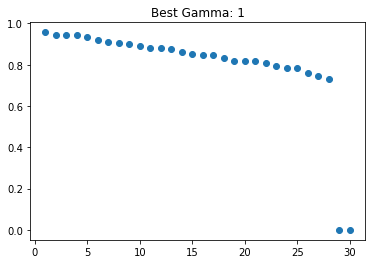

In [24]:
gamma_range = np.logspace(0.1, 1, 29)
scores=np.zeros(N)
best_score=-np.inf

for d in range(1,29):
    SVM = svm.SVC(gamma = gamma_range[d])
    scores[d-1] = cross_val_score(SVM, X_train, y_train, cv=5).mean()
    if scores[d-1]>best_score:
        best_score=scores[d-1]
        best_gamma=d

fig, ax = plt.subplots(1)
ax.scatter(np.arange(1,N+1), scores)
ax.set(title="Best Gamma: " + str(best_gamma))

We have found that the best gamma/complexity parameter for the SVM model is 1. Now we try to fit onto the model and check the performance.

In [25]:
SVM = svm.SVC(gamma = best_gamma)
SVM.fit(X_train, y_train)
SVM.score(X_test, y_test)

0.9848484848484849

The score indicates that the accuracy of this model predicting the species of penguins is around 98.5%. 

### ii) Confusion Matrix 

In [26]:
y_pred = SVM.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  0],
       [ 1,  9,  0],
       [ 0,  0, 24]])

The confusion matrix indicates that there is one mistake in the prediction. One Chinstrap penguin is predicted to be an Adeleie penguin by this model. 

### iii) Decision Region

""


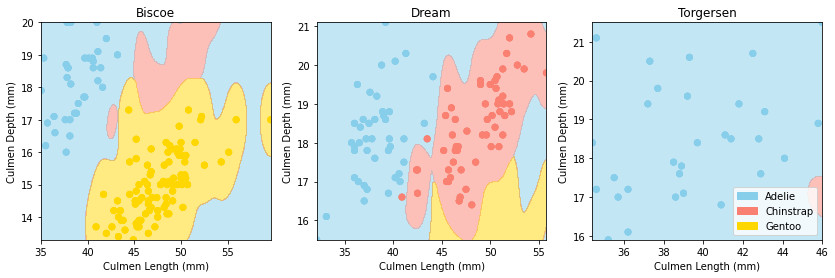

In [27]:
fig,ax=plt.subplots(1, 3, figsize = (14,4))
X_train.groupby(["Island"]).apply(plot_regions, SVM, y_train)

In this part, we can clearly visualize the one mistake being made in the middle decison region plot. One red dot that represnts a Chinstrap penguin appears in the blue shaded area where is supposed to be the region for Adelie penguin (so blue dots only). As we discussed before in the exploratory analysis, Chinstrap has similar culmen depth with Adelie, so it is harder to distinguish between these two species with clear boundaries. In contrast, since Gentoo stands out by having the lowest culmen depth, no mistake is being made on Gentoo. The mistake might be attributed the limitation of SVM algorithm itself. SVM does not perform very well when the data set has more noise i.e. when target classes are overlapping. In our case, certain range of culmen length and culmen depth of Chinstrap and Adelie can be overlapping, so the overlapping point happens to be a wrong prediction. 

# Conclusion

We have used three different machine learning models including Random Forest (RF), K-Nearest Neighbors (KNN), and Suppor Vector Machines (SVM). Overall, the performances for all of them are good: RF and SVM have the highest accuracy around 98.5% and KNN has an accuracy at about 97%. Both RF and SVM make one mistake in the prediction and KNN makes two mistakes. 

The three features we have chosen are culmen depth, culmen length, and island. Based on our exploratory analysis and feature selection process, these three variables allow us to make the best inference on the data. First, the two quantitative variables are positively related for each species on different islands. The relationship helps with data inference. Second, using the qualitative variable to group the quantitative data sets (referring to the boxplot and bar graph), we have found distinctive features for each species of penguins which can be used for prediction as well. The cross validation and feature selection consolidate our judgement on the three variables because for all three machine learning models, our selected features give the best performances indicated by the cross validation score. 

All models have limitations. In our case, we would recommend using RF. Even though RF and SVM have the same accuracy, RF performs better than SVM shown by their decison regions. One of the characteristics of RF is that the range of predictions RF can make is bound by the highest and lowest labels in the training data. This behavior can be problematic in certain cases but it happens to work correctly in our case. As shown in the decision region graphs, the contour or the predicted region of RF are more accurate (closer to reality) than the ones for SVM. For example, on Biscoe island, there are only Adelie and Gentoo penguins; the RF decison region indicates the fact correctly by only having blue and yellow shaded areas, but there is an area shaded red on the SVM decision region graph. The reason might be that RF is not as precise as SVM, so there is a clear cut (which is what we need for distinguishing Adelie and Gentoo) decided by the highest and lowest values for differen categories. On the other hand, SVM is more sensitive to overlapping datas, which causes the model to be inaccurate on overlapping regions. 

Limitations targeting SVM and KNN happen to exist in this specific data set of penguins which makes them unfit. SVM does not perform well on overlapping data (discussed above). KNN does not performe well on unbalanced data (there are different numbers of penguins for each category), so we would not recommend KNN as well. In conclusion, RF is the best model that predicts the species of penguins with the highest accuracy in our case. However, one thing to notice is that it could be really bad to further extrapolate using RF model. For the purpose of our project, we are ignoring this problem. 